### Домашнее задание к вебинару 7 -chess  
https://www.kaggle.com/brendan45774/chess-piece-dectection/

In [1]:
import numpy as np
import os
import shutil
from pathlib import Path
from glob import glob #находит все пути по шаблону
from PIL import Image

import matplotlib.pyplot as plt
from xml.etree import ElementTree
import cv2

In [2]:
images = '../input/chess-piece-dectection/images/'
annotations = '../input/chess-piece-dectection/annotations/'

annotations_paths = sorted([i for i in Path(annotations).glob('*.xml')])
images_paths = sorted([i for i in Path(images).glob('*.png')])

In [3]:
images_paths[:10]

[PosixPath('../input/chess-piece-dectection/images/chess0.png'),
 PosixPath('../input/chess-piece-dectection/images/chess1.png'),
 PosixPath('../input/chess-piece-dectection/images/chess10.png'),
 PosixPath('../input/chess-piece-dectection/images/chess11.png'),
 PosixPath('../input/chess-piece-dectection/images/chess12.png'),
 PosixPath('../input/chess-piece-dectection/images/chess13.png'),
 PosixPath('../input/chess-piece-dectection/images/chess14.png'),
 PosixPath('../input/chess-piece-dectection/images/chess15.png'),
 PosixPath('../input/chess-piece-dectection/images/chess16.png'),
 PosixPath('../input/chess-piece-dectection/images/chess17.png')]

In [4]:
print(f'Всего изображение : {len(images_paths)}, аннотаций : {len(annotations_paths)}')
if len(images_paths) == len(annotations_paths):
    print('Количество изображений и аннотаций совпадает, все верно')
else:
    print('Что-то пошло не так')

Всего изображение : 81, аннотаций : 81
Количество изображений и аннотаций совпадает, все верно


In [5]:
# Для интереса изучим изображение с нескольими классами
img_path = '../input/chess-piece-dectection/images/chess17.png'
annot_path = '../input/chess-piece-dectection/annotations/chess17.xml'

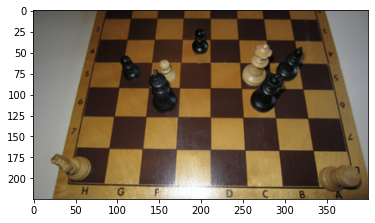

In [6]:
img = np.array(Image.open(img_path))
plt.imshow(img)
plt.show()

In [7]:
with open(annot_path, 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>chess17.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>white-knight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>21</xmin>
            <ymin>171</ymin>
            <xmax>71</xmax>
            <ymax>204</ymax>
        </bndbox>
    </object>
    <object>
        <name>white-rook</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>342</xmin>
            <ymin>184</ymin>
            <xmax>393</xmax>
            <ymax>217</ymax>
        </bndbox>
    </object>
    <object>
        <name>black-king</name>
        <pose>Unspecified</pose>
        <truncated>0</truncate

Построим разметку 

In [8]:
file = open(annot_path, 'r')
string = file.read()
tree = ElementTree.fromstring(string)
xmin = []
ymin = []
xmax = []
ymax = []

for i in tree.iter("bndbox"):
    xmin.append(i.find('xmin').text)
    ymin.append(i.find('ymin').text)
    xmax.append(i.find('xmax').text)
    ymax.append(i.find('ymax').text)
    
coords = []
for i in range(len(xmin)):
    coords.extend(((int(xmin[i]), (int(ymin[i]))), (int(xmax[i]), int(ymax[i]))))

(21, 171) (71, 204)
(342, 184) (393, 217)
(138, 70) (172, 124)
(104, 54) (129, 84)
(190, 22) (210, 53)
(150, 59) (172, 89)
(260, 75) (300, 123)
(250, 40) (286, 91)
(290, 44) (324, 85)


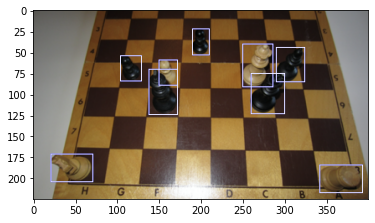

In [9]:
for i in range(0, len(coords), 2):
    start = (coords[i])
    end = (coords[i+1])
    print(start, end)
    cv2.rectangle(img, start, end, color = (0, 0, 255)) 
plt.imshow(img)
plt.show()

In [10]:
# img = np.array(Image.open(img_path))
# file = open(annot_path, 'r')
# string = file.read()
# coords = []
# coords.append(int(string[string.find('<xmin>') + len('<xmin>') : string.find('</xmin>')]))
# coords.append(int(string[string.find('<ymin>') + len('<ymin>') : string.find('</ymin>')]))
# coords.append(int(string[string.find('<xmax>') + len('<xmax>') : string.find('</xmax>')]))
# coords.append(int(string[string.find('<ymax>') + len('<ymax>') : string.find('</ymax>')]))
# file.close()

# cv2.rectangle(img, (coords[0], coords[1]), (coords[2], coords[3]), color = (0, 0, 255)) 
# plt.imshow(img)
# plt.show()

In [11]:
# Определим какие есть классы
# В описании датасета указано 5 классов
# classes = np.array(['Rook', 'Bishop', 'Pawn', 'Knight', 'Queen'])

# Однако на самом деле оказалось их больше, проверим это

classes = []
for annotation in annotations_paths:
    file = open(annotation, 'r')
    string = file.read()
    class_name = string[string.find('<name>') + len('<name>') : string.find('</name>')]
    
    if class_name not in classes:
        classes.append(class_name)

classes = np.array(classes)
classes
   

array(['black-king', 'black-knight', 'white-queen', 'black-bishop',
       'white-king', 'white-pawn', 'white-knight', 'white-rook',
       'black-rook', 'black-pawn', 'white-bishop', 'black-queen'],
      dtype='<U12')

### Preparing custom dataset

In [12]:
os.makedirs('imageai/data/train/images', exist_ok=True)
os.makedirs('imageai/data/train/annotations', exist_ok=True)

os.makedirs('imageai/data/validation/images', exist_ok=True)
os.makedirs('imageai/data/validation/annotations', exist_ok=True)

os.makedirs('imageai/data/test/images', exist_ok=True)
os.makedirs('imageai/data/test/annotations', exist_ok=True)

In [13]:
# Определим количество объектов на тренировку, валидацию и тест
n_imgs = len(images_paths)
n_split = n_imgs // 5
n_imgs, n_split

(81, 16)

In [14]:
for i, (annot_path, img_path) in enumerate(zip(annotations_paths, images_paths)):    
    if i > n_imgs:
        break
    # train-val-test split
    if i < n_split:
        shutil.copy(img_path, 'imageai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*2:
        shutil.copy(img_path, 'imageai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, 'imageai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/train/annotations/' + annot_path.parts[-1])

In [15]:
print(len(list(Path('imageai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/validation/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/test/annotations/').glob('*.xml'))))

49
16
16


In [16]:
list(Path('imageai/data/test/annotations/').glob('*.xml'))[:10]

[PosixPath('imageai/data/test/annotations/chess17.xml'),
 PosixPath('imageai/data/test/annotations/chess20.xml'),
 PosixPath('imageai/data/test/annotations/chess16.xml'),
 PosixPath('imageai/data/test/annotations/chess11.xml'),
 PosixPath('imageai/data/test/annotations/chess18.xml'),
 PosixPath('imageai/data/test/annotations/chess13.xml'),
 PosixPath('imageai/data/test/annotations/chess2.xml'),
 PosixPath('imageai/data/test/annotations/chess12.xml'),
 PosixPath('imageai/data/test/annotations/chess1.xml'),
 PosixPath('imageai/data/test/annotations/chess14.xml')]

### Create and train custom model
https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/Custom/CUSTOMDETECTIONTRAINING.md

#### ImageAI

In [17]:
!pip install imageai

     |████████████████████████████████| 160 kB 830 kB/s            
     |████████████████████████████████| 14.9 MB 5.1 MB/s            
     |████████████████████████████████| 2.1 MB 55.6 MB/s            
     |████████████████████████████████| 11.6 MB 53.7 MB/s            
     |████████████████████████████████| 2.9 MB 56.0 MB/s            
     |████████████████████████████████| 26.1 MB 53.2 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=c2efe5bba1cbc0b5474c24057d8a796d2a9d7f0fb4636ae5072a93ab39dbaa94
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Unins

In [18]:
from imageai.Detection.Custom import DetectionModelTrainer

In [19]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data")
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=30,
                       train_from_pretrained_model="../input/gb-pretrainedyolov3h5/pretrained-yolov3.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.82
Anchor Boxes generated.
Detection configuration saved in  ./imageai/data/json/detection_config.json
Evaluating over 16 samples taken from ./imageai/data/validation
Training over 49 samples  given at ./imageai/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  49
Number of Validation Samples:  16
Number of Experiments:  30
Training with transfer learning from pretrained Model


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic

Epoch 1/30
56/56 [==============================] - 51s 777ms/step - loss: 155.6507 - yolo_layer_loss: 22.5155 - yolo_layer_1_loss: 43.8393 - yolo_layer_2_loss: 77.7181 - val_loss: 194.8550 - val_yolo_layer_loss: 23.7835 - val_yolo_layer_1_loss: 52.0652 - val_yolo_layer_2_loss: 107.4268
Epoch 2/30
56/56 [==============================] - 39s 676ms/step - loss: 80.9056 - yolo_layer_loss: 12.5473 - yolo_layer_1_loss: 22.4150 - yolo_layer_2_loss: 34.3625 - val_loss: 124.0922 - val_yolo_layer_loss: 17.8774 - val_yolo_layer_1_loss: 31.5392 - val_yolo_layer_2_loss: 63.0939
Epoch 3/30
56/56 [==============================] - 39s 682ms/step - loss: 69.1282 - yolo_layer_loss: 14.0787 - yolo_layer_1_loss: 18.1585 - yolo_layer_2_loss: 25.3102 - val_loss: 80.6169 - val_yolo_layer_loss: 14.2697 - val_yolo_layer_1_loss: 19.0162 - val_yolo_layer_2_loss: 35.7518
Epoch 4/30
56/56 [==============================] - 40s 712ms/step - loss: 62.8624 - yolo_layer_loss: 12.9046 - yolo_layer_1_loss: 16.2636 - 

### Evaluating custom model

In [20]:
custom_model_path = sorted(list(Path('./imageai/data/models/').iterdir()))[-1]

In [21]:
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data/")
metrics = trainer.evaluateModel(model_path=custom_model_path,
                                json_path="imageai/data/json/detection_config.json",
                                
                                # подберем оптимальные трешхолды
                                iou_threshold=0.4, 
                                object_threshold=0.4,
                                nms_threshold=0.5) 

Starting Model evaluation....
Evaluating over 16 samples taken from ./imageai/data/validation
Training over 49 samples  given at ./imageai/data/train
Model File:  imageai/data/models/detection_model-ex-029--loss-0031.985.h5 

Evaluation samples:  16
Using IoU:  0.4
Using Object Threshold:  0.4
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0175
black-king: 0.0000
black-knight: 0.1429
black-pawn: 0.4705
black-queen: 0.0000
black-rook: 0.3400
white-bishop: 0.0000
white-king: 0.1429
white-knight: 0.0000
white-pawn: 0.4375
white-queen: 0.0000
white-rook: 0.0000
mAP: 0.1293


#### Testing

In [22]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(custom_model_path)
detector.setJsonPath("imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=70,
                                             input_image="imageai/data/test/images/chess21.png",
                                             output_image_path="detected.jpg")

In [23]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-queen  :  78.8718044757843  :  [81, 19, 133, 73]
white-bishop  :  71.4452862739563  :  [83, 34, 139, 84]
white-king  :  74.79503750801086  :  [79, 24, 134, 99]
black-knight  :  72.08197116851807  :  [256, 29, 308, 96]
white-bishop  :  78.07028889656067  :  [122, 153, 177, 202]
white-rook  :  81.25072121620178  :  [122, 153, 177, 202]
white-king  :  80.78009486198425  :  [122, 155, 192, 203]
white-knight  :  84.95921492576599  :  [122, 155, 192, 203]
white-pawn  :  71.14802598953247  :  [122, 155, 192, 203]
black-bishop  :  81.80443048477173  :  [299, 151, 398, 207]
black-knight  :  89.15660977363586  :  [299, 151, 398, 207]
black-pawn  :  89.20827507972717  :  [299, 151, 398, 207]
black-queen  :  84.45994853973389  :  [299, 151, 398, 207]
black-rook  :  82.7767014503479  :  [299, 151, 398, 207]
white-bishop  :  75.39741396903992  :  [81, 16, 118, 65]


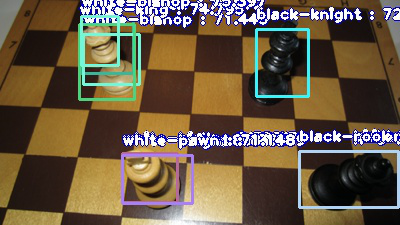

In [24]:
# from PIL import Image
Image.open('detected.jpg')

Конечно , классификация и детекция получились не идеальны, однако с увеличением количества экспериментов и варьирование thresholds и понижением minimun_percentage_probability, результат заметно улучшился, как минимум найдены все объекты.

In [25]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(custom_model_path)
detector.setJsonPath("imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="imageai/data/test/images/chess14.png",
                                             output_image_path="detected.jpg")

In [26]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-knight  :  80.33987283706665  :  [164, 67, 241, 152]


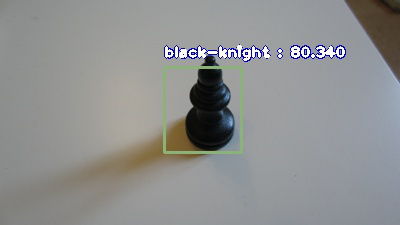

In [27]:
Image.open('detected.jpg')

Есть проблема аналогичная задаче с фруктами. Многие фигуры похожи друг на друга (особенно, если фото сделано сверху), что затрудняет классификацию и детекцию для модели. Проблем с различием цветов фигур не возникло.  
Чем больше объектов для модели, тем слабее результат, единичные объекты детектируются неплохо.